# Problem Statement 7: (Process the relevant data)
From the housing data(Data/housing.csv) read the following columns which may be relevant to the requirement.
•	District Name
•	Rural/Urban
•	Total Number of households
•	Total Number of Livable
•	Total Number of Dilapidated
•	Latrine_premise

In the given data The total number of households, Total Number of Livable, Total Number of Dilapidated, Latrine_premise, etc. seem to be in percentage terms and not in absolute terms.
The total number of households in a district can be found in the census data. Take the information from the census data and find the absolute values for the Total Number of Dilapidated, and Latrine_premise for both rural and urban areas of each district.

Calculate the data and rename the column names and save it in a CSV file named “housing.csv” in the “Clean_Data” folder, such that it  has the following column names:
•	District
•	Households_Rural
•	Households_Rural_Livable
•	Households_Rural_Dilapidated
•	Households_Rural_Toilet_Premise
•	Households_Urban
•	Households_Urban_Livable
•	Households_Urban_Dilapidated
•	Households_Urban_Toilet_Premise

Report if any district data is in one file but not the other.


In [94]:
import pandas as pd

In [95]:
census_df=pd.read_csv("Clean_Data/census.csv",usecols=["State/UT","District","Households_Rural","Households_Urban","Population","Households"])
main_df=census_df.copy()
main_df

,State/UT,District,Population,Households_Rural,Households_Urban,Households
0,Jammu And Kashmir,Kupwara,870354.0,158438.0,23226.0,181664.0
1,Jammu And Kashmir,Badgam,753745.0,160649.0,27190.0,187839.0
2,Jammu And Kashmir,Leh(Ladakh),133487.0,36920.0,17474.0,54394.0
3,Jammu And Kashmir,Kargil,140802.0,40370.0,7774.0,48144.0
4,Jammu And Kashmir,Punch,476835.0,132139.0,15269.0,147408.0
...,...,...,...,...,...,...
635,Pondicherry,Mahe,41816.0,0.0,12110.0,12110.0
636,Pondicherry,Karaikal,200222.0,35618.0,33715.0,69333.0
637,Andaman And Nicobar Islands,Nicobars,36842.0,15958.0,0.0,15958.0
638,Andaman And Nicobar Islands,North AND Middle Andaman,105597.0,39091.0,1094.0,40185.0


In [96]:
main_df.isna().sum()

State/UT            0
District            0
Population          1
Households_Rural    6
Households_Urban    3
Households          5
dtype: int64

In [97]:
houses_df=pd.read_csv("DS_Python_SQL_ETL_Healthcare_Census/Data/housing.csv",usecols=["State Name","District Name","Rural/Urban","Total Number of households",
                                                    "Total Number of Livable","Total Number of Dilapidated","Latrine_premise"])
hs_df=houses_df.copy()
hs_df

,State Name,District Name,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,JAMMU & KASHMIR,Kupwara,Rural,100,58.1,8.3,48.9
1,JAMMU & KASHMIR,Kupwara,Total,100,57.3,7.9,50.9
2,JAMMU & KASHMIR,Kupwara,Urban,100,49.5,4.8,70.2
3,JAMMU & KASHMIR,Badgam,Rural,100,46.3,3.9,83.3
4,JAMMU & KASHMIR,Badgam,Total,100,44.7,3.8,84.3
...,...,...,...,...,...,...,...
1903,ANDAMAN & NICOBAR ISLANDS,North & Middle Andaman,Total,100,44.6,2.8,48.3
1904,ANDAMAN & NICOBAR ISLANDS,North & Middle Andaman,Urban,100,55.9,6.6,56.1
1905,ANDAMAN & NICOBAR ISLANDS,South Andaman,Rural,100,33.5,3.5,64.7
1906,ANDAMAN & NICOBAR ISLANDS,South Andaman,Total,100,26.4,2.2,78.3


In [98]:
telangana_df=pd.read_csv("DS_Python_SQL_ETL_Healthcare_Census/Data/Telangana.txt",names=["Districts"])
telangana_df

,Districts
0,Adilabad
1,Nizamabad
2,Karimnagar
3,Medak
4,Hyderabad
5,Rangareddy
6,Mahbubnagar
7,Nalgonda
8,Warangal
9,Khammam


In [99]:
telangana_dis_idx=hs_df["District Name"].isin(telangana_df["Districts"])

In [100]:
hs_df.loc[telangana_dis_idx,"State Name"]="telangana"

In [101]:
main_df["District"]=main_df["District"].str.lower()
hs_df["District Name"]=hs_df["District Name"].str.lower()

In [102]:
'''
Finding districts that are there in cesus data which are not there in housing data
'''
districts_not_in_housing_df=[]
district_in_housing_data=hs_df["District Name"].to_list()
for data in main_df["District"]:
    if data not in district_in_housing_data:
        districts_not_in_housing_df.append(data)
print(districts_not_in_housing_df)

['lahul and spiti', 'dadra and nagar haveli', 'pondicherry', 'north  and middle andaman']


In [103]:
'''
Finding districts that are there in housing data which are not there in census data
'''
districts_not_in_census_df=[]
district_in_census_data=main_df["District"].to_list()
for data in hs_df["District Name"]:
    if data not in district_in_census_data:
        districts_not_in_census_df.append(data)
print(districts_not_in_census_df)

['lahul & spiti', 'lahul & spiti', 'dadra & nagar haveli', 'dadra & nagar haveli', 'dadra & nagar haveli', 'puducherry', 'puducherry', 'puducherry', 'north  & middle andaman', 'north  & middle andaman', 'north  & middle andaman']


In [104]:
hs_df["District Name"]=hs_df["District Name"].str.replace("&","and")
hs_df["District Name"]=hs_df["District Name"].str.replace("puducherry","pondicherry")
'''
Noe both the tables have same districts
'''

'\nNoe both the tables have same districts\n'

In [105]:
main_df["State/UT"]=main_df["State/UT"].str.lower()
hs_df["State Name"]=hs_df["State Name"].str.lower()

In [106]:
'''
Finding districts that are there in cesus data which are not there in housing data
'''
districts_not_in_housing_df=[]
district_in_housing_data=hs_df["State Name"].to_list()
for data in main_df["State/UT"]:
    if data not in district_in_housing_data:
        districts_not_in_housing_df.append(data)
print(districts_not_in_housing_df)

['jammu and kashmir', 'jammu and kashmir', 'jammu and kashmir', 'jammu and kashmir', 'jammu and kashmir', 'jammu and kashmir', 'jammu and kashmir', 'jammu and kashmir', 'jammu and kashmir', 'jammu and kashmir', 'jammu and kashmir', 'jammu and kashmir', 'jammu and kashmir', 'jammu and kashmir', 'jammu and kashmir', 'jammu and kashmir', 'jammu and kashmir', 'jammu and kashmir', 'jammu and kashmir', 'jammu and kashmir', 'jammu and kashmir', 'jammu and kashmir', 'orissa', 'orissa', 'orissa', 'orissa', 'orissa', 'orissa', 'orissa', 'orissa', 'orissa', 'orissa', 'orissa', 'orissa', 'orissa', 'orissa', 'orissa', 'orissa', 'orissa', 'orissa', 'orissa', 'orissa', 'orissa', 'orissa', 'orissa', 'orissa', 'orissa', 'orissa', 'orissa', 'orissa', 'orissa', 'orissa', 'daman and diu', 'daman and diu', 'dadra and nagar haveli', 'pondicherry', 'pondicherry', 'pondicherry', 'pondicherry', 'andaman and nicobar islands', 'andaman and nicobar islands', 'andaman and nicobar islands']


In [107]:
'''
Finding districts that are there in housing data which are not there in census data
'''
districts_not_in_census_df=[]
district_in_census_data=main_df["State/UT"].to_list()
for data in hs_df["State Name"]:
    if data not in district_in_census_data:
        districts_not_in_census_df.append(data)
print(districts_not_in_census_df)

['jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & kashmir', 'jammu & ka

In [108]:
hs_df["State Name"]=hs_df["State Name"].str.replace("&","and")
hs_df["State Name"]=hs_df["State Name"].str.replace("puducherry","pondicherry")
hs_df["State Name"]=hs_df["State Name"].str.replace("odisha","orissa")

In [109]:
merged_df=main_df.merge(hs_df,right_on=["District Name","State Name"],left_on=["District","State/UT"])
merged_df

,State/UT,District,Population,Households_Rural,Households_Urban,Households,State Name,District Name,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,jammu and kashmir,kupwara,870354.0,158438.0,23226.0,181664.0,jammu and kashmir,kupwara,Rural,100,58.1,8.3,48.9
1,jammu and kashmir,kupwara,870354.0,158438.0,23226.0,181664.0,jammu and kashmir,kupwara,Total,100,57.3,7.9,50.9
2,jammu and kashmir,kupwara,870354.0,158438.0,23226.0,181664.0,jammu and kashmir,kupwara,Urban,100,49.5,4.8,70.2
3,jammu and kashmir,badgam,753745.0,160649.0,27190.0,187839.0,jammu and kashmir,badgam,Rural,100,46.3,3.9,83.3
4,jammu and kashmir,badgam,753745.0,160649.0,27190.0,187839.0,jammu and kashmir,badgam,Total,100,44.7,3.8,84.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903,andaman and nicobar islands,north and middle andaman,105597.0,39091.0,1094.0,40185.0,andaman and nicobar islands,north and middle andaman,Total,100,44.6,2.8,48.3
1904,andaman and nicobar islands,north and middle andaman,105597.0,39091.0,1094.0,40185.0,andaman and nicobar islands,north and middle andaman,Urban,100,55.9,6.6,56.1
1905,andaman and nicobar islands,south andaman,238142.0,34901.0,50631.0,85532.0,andaman and nicobar islands,south andaman,Rural,100,33.5,3.5,64.7
1906,andaman and nicobar islands,south andaman,238142.0,34901.0,50631.0,85532.0,andaman and nicobar islands,south andaman,Total,100,26.4,2.2,78.3


In [110]:
merged_rural_df=merged_df[merged_df["Rural/Urban"]=="Rural"]
merged_urban_df=merged_df[merged_df["Rural/Urban"]=="Urban"]
merged_total_df=merged_df[merged_df["Rural/Urban"]=="Total"]

In [111]:
copy_of_merged_rural_df=merged_rural_df.copy()

In [112]:
copy_of_merged_rural_df[["HRL","HRD","HRLP"]]=copy_of_merged_rural_df[["Total Number of Livable","Total Number of Dilapidated","Latrine_premise"]].multiply(copy_of_merged_rural_df["Households_Rural"]/100,axis="index")

In [113]:
copy_of_merged_rural_df.head(2)

,State/UT,District,Population,Households_Rural,Households_Urban,Households,State Name,District Name,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise,HRL,HRD,HRLP
0,jammu and kashmir,kupwara,870354.0,158438.0,23226.0,181664.0,jammu and kashmir,kupwara,Rural,100,58.1,8.3,48.9,92052.478,13150.354,77476.182
3,jammu and kashmir,badgam,753745.0,160649.0,27190.0,187839.0,jammu and kashmir,badgam,Rural,100,46.3,3.9,83.3,74380.487,6265.311,133820.617


In [114]:
len(copy_of_merged_rural_df)

631

In [115]:
copy_of_merged_urban_df=merged_urban_df.copy()

In [116]:
copy_of_merged_urban_df[["HUL","HUD","HULP"]]=copy_of_merged_urban_df[["Total Number of Livable","Total Number of Dilapidated","Latrine_premise"]].multiply(copy_of_merged_urban_df["Households_Urban"]/100,axis="index")

In [117]:
len(copy_of_merged_urban_df)

637

In [118]:
copy_of_merged_urban_df.head(2)

,State/UT,District,Population,Households_Rural,Households_Urban,Households,State Name,District Name,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise,HUL,HUD,HULP
2,jammu and kashmir,kupwara,870354.0,158438.0,23226.0,181664.0,jammu and kashmir,kupwara,Urban,100,49.5,4.8,70.2,11496.87,1114.848,16304.652
5,jammu and kashmir,badgam,753745.0,160649.0,27190.0,187839.0,jammu and kashmir,badgam,Urban,100,33.8,2.6,90.4,9190.22,706.940,24579.760


In [119]:
copy_of_merged_total_df=merged_total_df.copy()

In [120]:
copy_of_merged_total_df[["HTL","HTD","HTLP"]]=copy_of_merged_total_df[["Total Number of Livable","Total Number of Dilapidated","Latrine_premise"]].multiply(copy_of_merged_total_df["Households"]/100,axis="index")

In [121]:
copy_of_merged_total_df.head(2)

,State/UT,District,Population,Households_Rural,Households_Urban,Households,State Name,District Name,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise,HTL,HTD,HTLP
1,jammu and kashmir,kupwara,870354.0,158438.0,23226.0,181664.0,jammu and kashmir,kupwara,Total,100,57.3,7.9,50.9,104093.472,14351.456,92466.976
4,jammu and kashmir,badgam,753745.0,160649.0,27190.0,187839.0,jammu and kashmir,badgam,Total,100,44.7,3.8,84.3,83964.033,7137.882,158348.277


In [122]:
final_rural_df=copy_of_merged_rural_df.copy()
final_urban_df=copy_of_merged_urban_df.copy()
final_total_df=copy_of_merged_total_df.copy()

In [123]:
final_rural_df=final_rural_df.drop(["State/UT","District","Households_Rural","Households_Urban","Households","Rural/Urban","Total Number of households","Total Number of Livable","Total Number of Dilapidated","Latrine_premise"],axis=1)
final_rural_df

,Population,State Name,District Name,HRL,HRD,HRLP
0,870354.0,jammu and kashmir,kupwara,92052.478,13150.354,77476.182
3,753745.0,jammu and kashmir,badgam,74380.487,6265.311,133820.617
6,133487.0,jammu and kashmir,leh(ladakh),19013.800,775.320,32526.520
9,140802.0,jammu and kashmir,kargil,29591.210,1412.950,39078.160
12,476835.0,jammu and kashmir,punch,78622.705,3171.336,18103.043
...,...,...,...,...,...,...
1892,950289.0,pondicherry,pondicherry,27847.424,2269.696,31251.968
1897,200222.0,pondicherry,karaikal,13107.424,747.978,16954.168
1900,36842.0,andaman and nicobar islands,nicobars,3798.004,191.496,12910.022
1902,105597.0,andaman and nicobar islands,north and middle andaman,17317.313,1055.457,18763.680


In [124]:
final_urban_df=final_urban_df.drop(["State/UT","District","Households_Rural","Households_Urban","Households","Rural/Urban","Total Number of households","Total Number of Livable","Total Number of Dilapidated","Latrine_premise"],axis=1)
final_urban_df

,Population,State Name,District Name,HUL,HUD,HULP
2,870354.0,jammu and kashmir,kupwara,11496.870,1114.848,16304.652
5,753745.0,jammu and kashmir,badgam,9190.220,706.940,24579.760
8,133487.0,jammu and kashmir,leh(ladakh),9540.804,192.214,16740.092
11,140802.0,jammu and kashmir,kargil,5348.512,93.288,7579.650
14,476835.0,jammu and kashmir,punch,4168.437,122.152,11497.557
...,...,...,...,...,...,...
1894,950289.0,pondicherry,pondicherry,38710.790,2444.892,168086.325
1896,41816.0,pondicherry,mahe,1913.380,133.210,11843.580
1899,200222.0,pondicherry,karaikal,7080.150,404.580,25083.960
1904,105597.0,andaman and nicobar islands,north and middle andaman,611.546,72.204,613.734


In [125]:
final_total_df=final_total_df.drop(["State/UT","District","Households_Rural","Households_Urban","Households","Rural/Urban","Total Number of households","Total Number of Livable","Total Number of Dilapidated","Latrine_premise"],axis=1)
final_total_df

,Population,State Name,District Name,HTL,HTD,HTLP
1,870354.0,jammu and kashmir,kupwara,104093.472,14351.456,92466.976
4,753745.0,jammu and kashmir,badgam,83964.033,7137.882,158348.277
7,133487.0,jammu and kashmir,leh(ladakh),28502.456,979.092,49172.176
10,140802.0,jammu and kashmir,kargil,34952.544,1540.608,46651.536
13,476835.0,jammu and kashmir,punch,83875.152,3390.384,27565.296
...,...,...,...,...,...,...
1895,41816.0,pondicherry,mahe,1913.380,133.210,11843.580
1898,200222.0,pondicherry,karaikal,20245.236,1109.328,42015.798
1901,36842.0,andaman and nicobar islands,nicobars,3798.004,191.496,12910.022
1903,105597.0,andaman and nicobar islands,north and middle andaman,17922.510,1125.180,19409.355


In [126]:
final_rural_df.head(2)

,Population,State Name,District Name,HRL,HRD,HRLP
0,870354.0,jammu and kashmir,kupwara,92052.478,13150.354,77476.182
3,753745.0,jammu and kashmir,badgam,74380.487,6265.311,133820.617


In [127]:
final_urban_df.head(2)

,Population,State Name,District Name,HUL,HUD,HULP
2,870354.0,jammu and kashmir,kupwara,11496.87,1114.848,16304.652
5,753745.0,jammu and kashmir,badgam,9190.22,706.940,24579.760


In [128]:
sample_final_merge=copy_of_merged_total_df.merge(copy_of_merged_urban_df,on=["District Name","State Name"],how="outer")

In [129]:
sample_final_merge

,State/UT_x,District_x,Population_x,Households_Rural_x,Households_Urban_x,Households_x,State Name,District Name,Rural/Urban_x,Total Number of households_x,...,Households_Urban_y,Households_y,Rural/Urban_y,Total Number of households_y,Total Number of Livable_y,Total Number of Dilapidated_y,Latrine_premise_y,HUL,HUD,HULP
0,jammu and kashmir,kupwara,870354.0,158438.0,23226.0,181664.0,jammu and kashmir,kupwara,Total,100,...,23226.0,181664.0,Urban,100.0,49.5,4.8,70.2,11496.870,1114.848,16304.652
1,jammu and kashmir,badgam,753745.0,160649.0,27190.0,187839.0,jammu and kashmir,badgam,Total,100,...,27190.0,187839.0,Urban,100.0,33.8,2.6,90.4,9190.220,706.940,24579.760
2,jammu and kashmir,leh(ladakh),133487.0,36920.0,17474.0,54394.0,jammu and kashmir,leh(ladakh),Total,100,...,17474.0,54394.0,Urban,100.0,54.6,1.1,95.8,9540.804,192.214,16740.092
3,jammu and kashmir,kargil,140802.0,40370.0,7774.0,48144.0,jammu and kashmir,kargil,Total,100,...,7774.0,48144.0,Urban,100.0,68.8,1.2,97.5,5348.512,93.288,7579.650
4,jammu and kashmir,punch,476835.0,132139.0,15269.0,147408.0,jammu and kashmir,punch,Total,100,...,15269.0,147408.0,Urban,100.0,27.3,0.8,75.3,4168.437,122.152,11497.557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,pondicherry,mahe,41816.0,0.0,12110.0,12110.0,pondicherry,mahe,Total,100,...,12110.0,12110.0,Urban,100.0,15.8,1.1,97.8,1913.380,133.210,11843.580
636,pondicherry,karaikal,200222.0,35618.0,33715.0,69333.0,pondicherry,karaikal,Total,100,...,33715.0,69333.0,Urban,100.0,21.0,1.2,74.4,7080.150,404.580,25083.960
637,andaman and nicobar islands,nicobars,36842.0,15958.0,0.0,15958.0,andaman and nicobar islands,nicobars,Total,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,andaman and nicobar islands,north and middle andaman,105597.0,39091.0,1094.0,40185.0,andaman and nicobar islands,north and middle andaman,Total,100,...,1094.0,40185.0,Urban,100.0,55.9,6.6,56.1,611.546,72.204,613.734


In [130]:
sample_final=sample_final_merge.merge(copy_of_merged_rural_df,on=["District Name","State Name"],how="outer")

In [131]:
sample_final.head(2)

,State/UT_x,District_x,Population_x,Households_Rural_x,Households_Urban_x,Households_x,State Name,District Name,Rural/Urban_x,Total Number of households_x,...,Households_Urban,Households,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise,HRL,HRD,HRLP
0,jammu and kashmir,kupwara,870354.0,158438.0,23226.0,181664.0,jammu and kashmir,kupwara,Total,100,...,23226.0,181664.0,Rural,100.0,58.1,8.3,48.9,92052.478,13150.354,77476.182
1,jammu and kashmir,badgam,753745.0,160649.0,27190.0,187839.0,jammu and kashmir,badgam,Total,100,...,27190.0,187839.0,Rural,100.0,46.3,3.9,83.3,74380.487,6265.311,133820.617


In [132]:
sample_final.columns

Index(['State/UT_x', 'District_x', 'Population_x', 'Households_Rural_x',
       'Households_Urban_x', 'Households_x', 'State Name', 'District Name',
       'Rural/Urban_x', 'Total Number of households_x',
       'Total Number of Livable_x', 'Total Number of Dilapidated_x',
       'Latrine_premise_x', 'HTL', 'HTD', 'HTLP', 'State/UT_y', 'District_y',
       'Population_y', 'Households_Rural_y', 'Households_Urban_y',
       'Households_y', 'Rural/Urban_y', 'Total Number of households_y',
       'Total Number of Livable_y', 'Total Number of Dilapidated_y',
       'Latrine_premise_y', 'HUL', 'HUD', 'HULP', 'State/UT', 'District',
       'Population', 'Households_Rural', 'Households_Urban', 'Households',
       'Rural/Urban', 'Total Number of households', 'Total Number of Livable',
       'Total Number of Dilapidated', 'Latrine_premise', 'HRL', 'HRD', 'HRLP'],
      dtype='object')

In [133]:
my_columns=['State Name', 'District Name','Population_x','HRL','HRD','HRLP', 'HUL', 'HUD', 'HULP','Households_Rural', 'Households_Urban']

In [134]:
df_final=sample_final.reindex(columns=my_columns)
df_final.head(2)

,State Name,District Name,Population_x,HRL,HRD,HRLP,HUL,HUD,HULP,Households_Rural,Households_Urban
0,jammu and kashmir,kupwara,870354.0,92052.478,13150.354,77476.182,11496.87,1114.848,16304.652,158438.0,23226.0
1,jammu and kashmir,badgam,753745.0,74380.487,6265.311,133820.617,9190.22,706.940,24579.760,160649.0,27190.0


In [135]:
df_final.isna().sum()
df_final.rename({"State Name":"State/UT",
                 "District Name":"District",
                 "Population_x":"Population",
                 "HRL":"Households_Rural_Livable",
                 "HRD":"Households_Rural_Dilapidated",
                 "HRLP":"Households_Rural_Toilet_Premise",
                 "HUL":"Households_Urban_Livable",
                 "HUD":"Households_Urban_Dilapidated",
                 "HULP":"Households_Urban_Toilet_Premise"
                 },axis=1,inplace=True)
df_final

,State/UT,District,Population,Households_Rural_Livable,Households_Rural_Dilapidated,Households_Rural_Toilet_Premise,Households_Urban_Livable,Households_Urban_Dilapidated,Households_Urban_Toilet_Premise,Households_Rural,Households_Urban
0,jammu and kashmir,kupwara,870354.0,92052.478,13150.354,77476.182,11496.870,1114.848,16304.652,158438.0,23226.0
1,jammu and kashmir,badgam,753745.0,74380.487,6265.311,133820.617,9190.220,706.940,24579.760,160649.0,27190.0
2,jammu and kashmir,leh(ladakh),133487.0,19013.800,775.320,32526.520,9540.804,192.214,16740.092,36920.0,17474.0
3,jammu and kashmir,kargil,140802.0,29591.210,1412.950,39078.160,5348.512,93.288,7579.650,40370.0,7774.0
4,jammu and kashmir,punch,476835.0,78622.705,3171.336,18103.043,4168.437,122.152,11497.557,132139.0,15269.0
...,...,...,...,...,...,...,...,...,...,...,...
635,pondicherry,mahe,41816.0,NaN,NaN,NaN,1913.380,133.210,11843.580,NaN,NaN
636,pondicherry,karaikal,200222.0,13107.424,747.978,16954.168,7080.150,404.580,25083.960,35618.0,33715.0
637,andaman and nicobar islands,nicobars,36842.0,3798.004,191.496,12910.022,NaN,NaN,NaN,15958.0,0.0
638,andaman and nicobar islands,north and middle andaman,105597.0,17317.313,1055.457,18763.680,611.546,72.204,613.734,39091.0,1094.0


In [136]:
df_final.to_csv("clean_data/housing.csv",index=False)

In [137]:
df_final.columns

Index(['State/UT', 'District', 'Population', 'Households_Rural_Livable',
       'Households_Rural_Dilapidated', 'Households_Rural_Toilet_Premise',
       'Households_Urban_Livable', 'Households_Urban_Dilapidated',
       'Households_Urban_Toilet_Premise', 'Households_Rural',
       'Households_Urban'],
      dtype='object')

# Problem Statement 8: (Visualise the housing data)
Visualize the following data for each state using appropriate methods:
•	Number of households per 100 people
•	Percentage of households that have toilet(s) in premise to the total number of households.
•	Urban to rural population ratio.


In [138]:
import matplotlib.pyplot as plt

In [139]:
grouped_data=df_final.groupby(by='State/UT').sum().reset_index()
grouped_data['State/UT']=grouped_data['State/UT'].str.title()
grouped_data.columns

Index(['State/UT', 'Population', 'Households_Rural_Livable',
       'Households_Rural_Dilapidated', 'Households_Rural_Toilet_Premise',
       'Households_Urban_Livable', 'Households_Urban_Dilapidated',
       'Households_Urban_Toilet_Premise', 'Households_Rural',
       'Households_Urban'],
      dtype='object')

(0.0, 100.0)

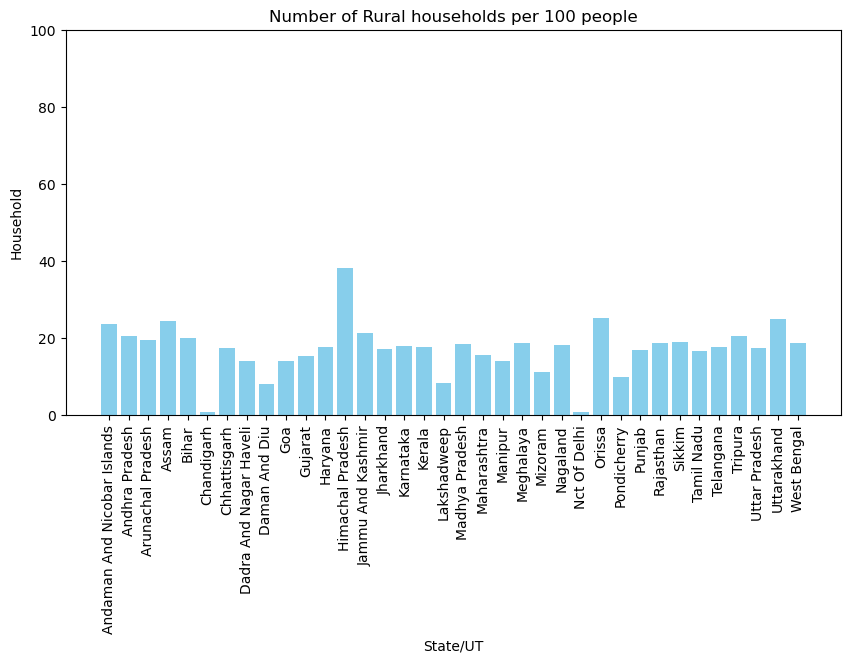

In [140]:
plt.figure(figsize=(10,5))
           
plt.bar(x=grouped_data['State/UT'],height=grouped_data['Households_Rural']*100 /grouped_data['Population'],color=["skyblue"])
plt.ylabel("Household")
plt.xlabel("State/UT")
plt.title("Number of Rural households per 100 people")
plt.xticks(rotation = 90)

plt.ylim(0,100)

(0.0, 100.0)

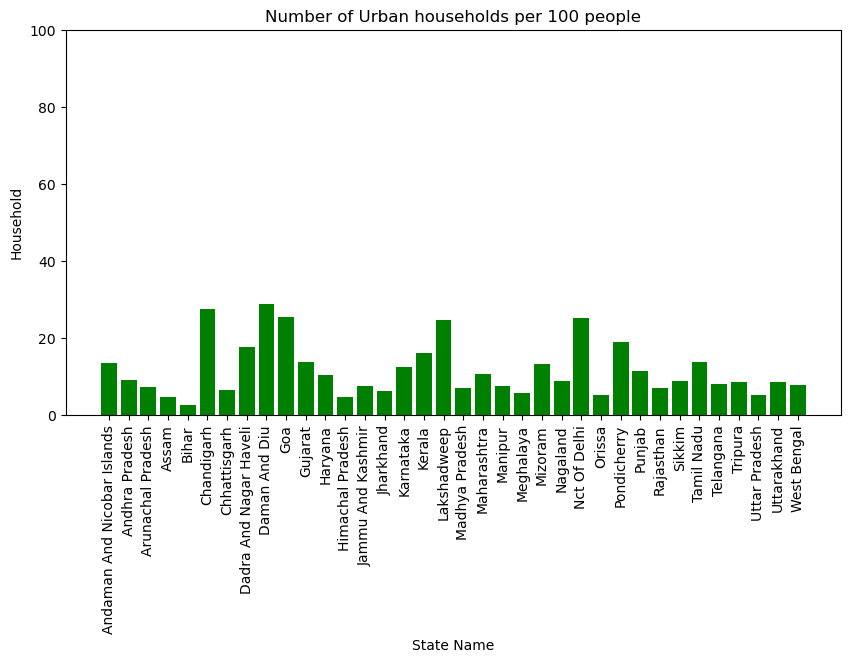

In [141]:
plt.figure(figsize=(10,5))
           
plt.bar(x=grouped_data['State/UT'],height=grouped_data['Households_Urban']*100 /grouped_data['Population'],color=["green"])
plt.ylabel("Household")
plt.xlabel("State Name")
plt.title("Number of Urban households per 100 people")
plt.xticks(rotation = 90)

plt.ylim(0,100)

(0.0, 110.0)

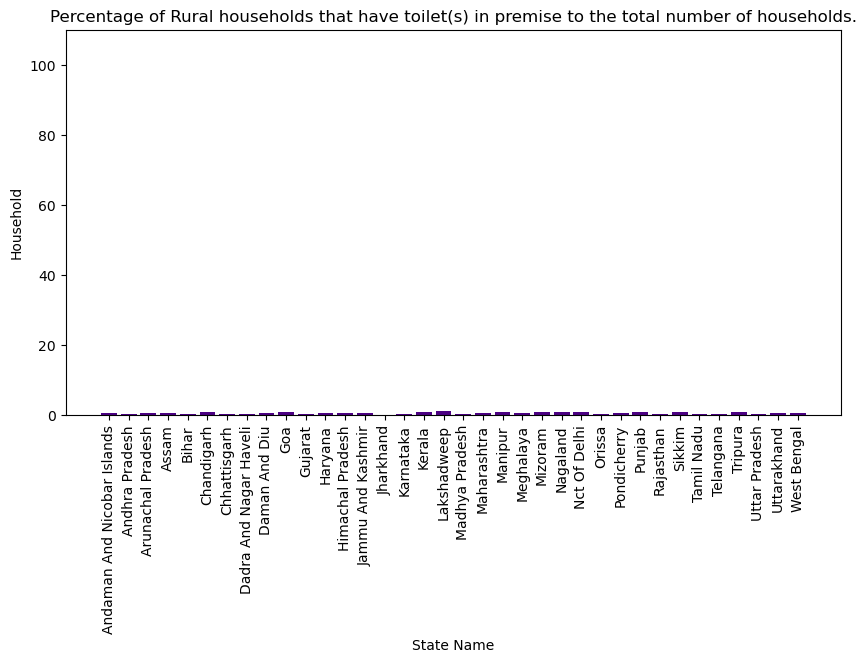

In [142]:
plt.figure(figsize=(10,5))
           
plt.bar(x=grouped_data['State/UT'],height=grouped_data['Households_Rural_Toilet_Premise'] /grouped_data['Households_Rural'],color=["indigo"])
plt.ylabel("Household")
plt.xlabel("State Name")
plt.title("Percentage of Rural households that have toilet(s) in premise to the total number of households.")
plt.xticks(rotation = 90)

plt.ylim(0,110)

(0.0, 110.0)

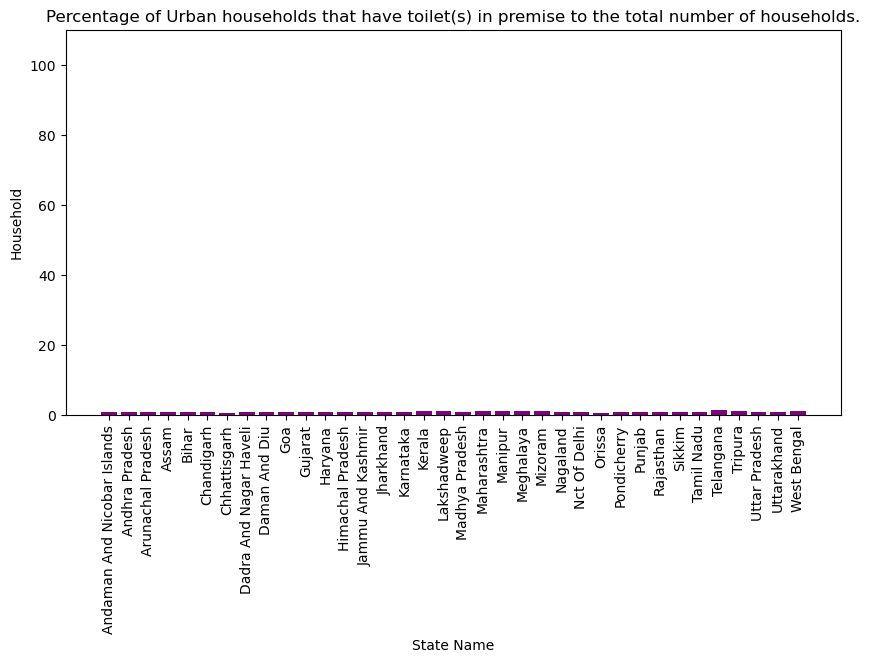

In [143]:
plt.figure(figsize=(10,5))
           
plt.bar(x=grouped_data['State/UT'],height=grouped_data['Households_Urban_Toilet_Premise'] /grouped_data['Households_Urban'],color=["purple"])
plt.ylabel("Household")
plt.xlabel("State Name")
plt.title("Percentage of Urban households that have toilet(s) in premise to the total number of households.")
plt.xticks(rotation = 90)

plt.ylim(0,110)

# Problem Statement 9: (Inconsistency in different datasets)
After the updates, the “Households_Rural” and “Households_Urban” data are redundant in both housing and census data. Compare the two data and see if there is a major difference between the values in the two files. A difference of more than 10% can be considered a major difference. Report the names of the districts where a major difference is found in the data.


In [145]:
df_census=pd.read_csv("clean_data/census.csv")
df_census

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu And Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu And Kashmir,Badgam,753745.0,398041.0,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Jammu And Kashmir,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,21019.0,250.0
3,Jammu And Kashmir,Kargil,140802.0,77785.0,63017.0,86236.0,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu And Kashmir,Punch,476835.0,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,Pondicherry,Mahe,41816.0,19143.0,22673.0,36470.0,16610.0,19860.0,0.0,12110.0,12110.0,19760.0,12543.0,9428.0,85.0
636,Pondicherry,Karaikal,200222.0,97809.0,102413.0,154916.0,79903.0,75013.0,35618.0,33715.0,69333.0,NaN,60089.0,NaN,366.0
637,Andaman And Nicobar Islands,Nicobars,36842.0,20727.0,16115.0,25332.0,15397.0,9935.0,15958.0,0.0,15958.0,18786.0,12088.0,5922.0,46.0
638,Andaman And Nicobar Islands,North AND Middle Andaman,105597.0,54861.0,50736.0,78683.0,43186.0,35497.0,39091.0,1094.0,40185.0,57350.0,30741.0,17464.0,42.0


In [197]:
df_final.loc[(df_final["Households_Urban"]/ df_census["Households_Urban"])>1 ].index


Int64Index([], dtype='int64')

In [198]:
df_final.loc[(df_final["Households_Rural"]/ df_census["Households_Rural"])>1 ].index


Int64Index([], dtype='int64')